In [66]:
import numpy as np
npz = np.load('./checkpoints/futs_02_01_02_00_37_il4096_ol1_sl64_win2_fa10_dm256_nh4_el3_itr0/output.npz')
print(npz.files)

pred = npz['preds'].flatten()
target = npz['trues'].flatten()
ts = npz['ts'].flatten()

ts_sorted_id = np.argsort(ts)
pred = pred[ts_sorted_id]
target = target[ts_sorted_id]
ts = ts[ts_sorted_id]

print("Corr: ", np.corrcoef(pred, target))
from sklearn.metrics import r2_score
print("R2: ", r2_score(target, pred))

import pandas as pd
data = pd.DataFrame({'ts':ts, 'pred': pred, 'target': target})

['preds', 'trues', 'ts']
Corr:  [[1.         0.76532252]
 [0.76532252 1.        ]]
R2:  0.43075753596783606


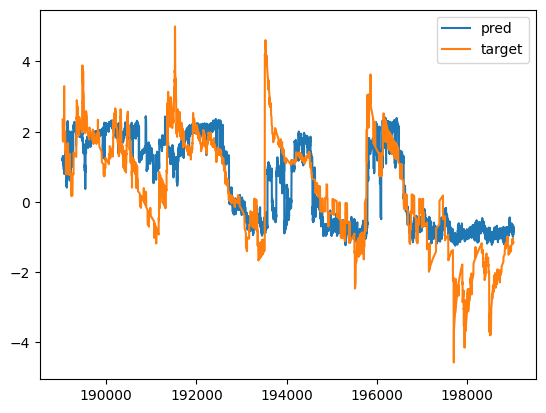

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import random
# create a sample DataFrame
idx = random.randint(0, data.shape[0] - 10000)
df = pd.DataFrame(data[['pred', 'target']][idx:idx + 10000])
# plot lines for each column
df.plot()
plt.show()

In [73]:
raw_data = pd.read_parquet("/workspace/futs/data/ZCE_CH_UR/test/daily_frame.20240105.parquet")

In [37]:
date_df = raw_data[['ts', 'extdata::book=book_UR::data_name=forward_return_vwap_600s']]

In [61]:
pd.merge(date_df, data, on='ts')

,ts,extdata::book=book_UR::data_name=forward_return_vwap_600s,pred,target
0,1704416340000,0.000000,1.900010,0.000000
1,1704416400000,0.707107,1.323005,0.707107
2,1704416400250,0.521961,1.394748,0.521962
3,1704416400500,-0.056691,1.149024,-0.056691
4,1704416400750,0.359903,1.409366,0.359903
...,...,...,...,...
35478,1704437999000,-2.126323,-0.480275,-2.126323
35479,1704437999250,-2.120398,-0.515383,-2.120398
35480,1704437999500,-2.114510,-0.552340,-2.114510
35481,1704437999750,-2.108660,-0.392756,-2.108660
